# This is basics tutorial on GYM - a Reinforcement Learning framework with Python

In [1]:
import gym


## Visualization purpose
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
"""Get your environment"""
env = gym.make('CartPole-v0')

[2017-10-03 16:55:05,085] Making new env: CartPole-v0


For more information about environments, visits:  <br>
https://gym.openai.com/envs/

** For reinforcement learning, we're facing a scenario that we do not have any information about future reward or the transistion function T(s,a,s'), thus it is important to get samples (episodes)** <br>


In [3]:
#put ourselves in start states
#also return a state
env.reset()

array([-0.03696661, -0.01114121, -0.02560748, -0.04850873])

<font color = green>** The following 2 cells are for displaying the animation  **</font> <br>
From this guy: http://mckinziebrandon.me/TensorflowNotebooks/2016/12/21/openai.html

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

Number of step:  12



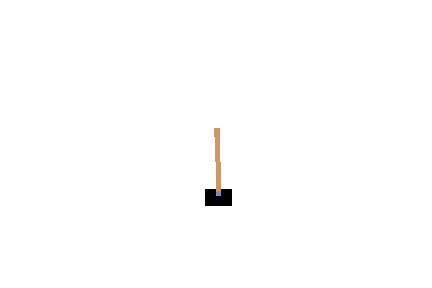
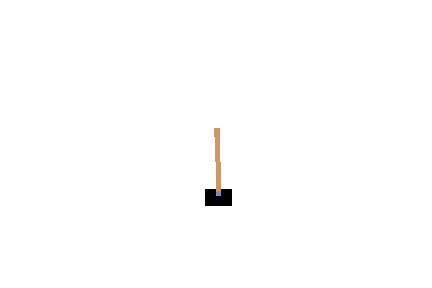
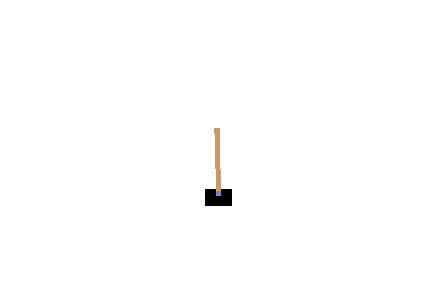
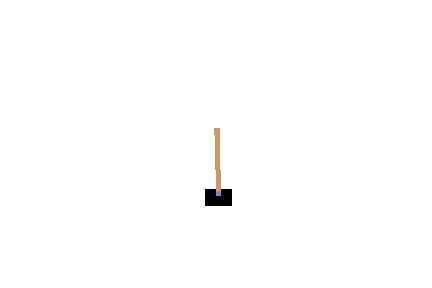
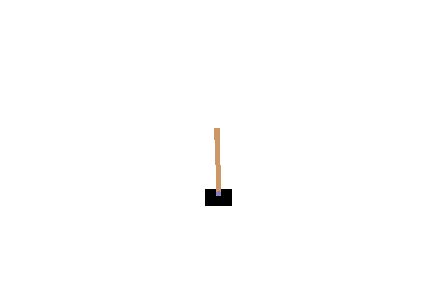
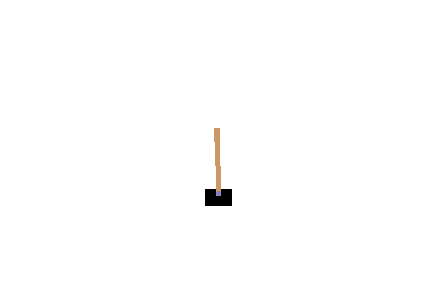
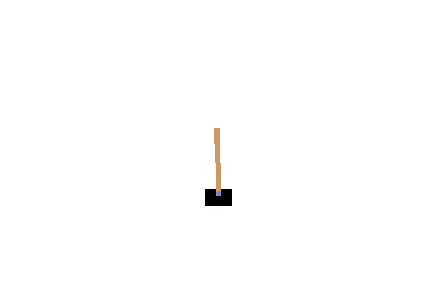
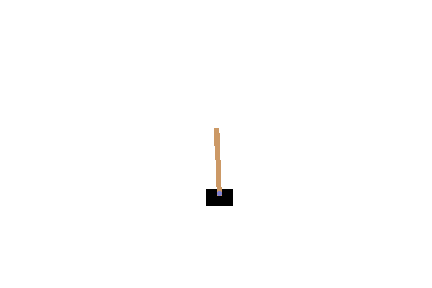
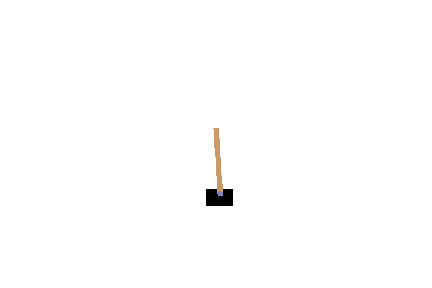
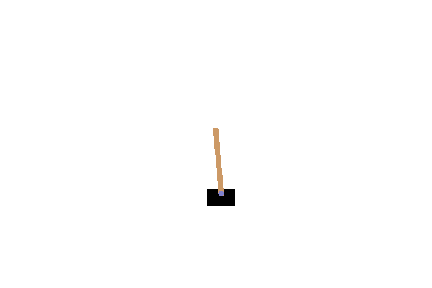
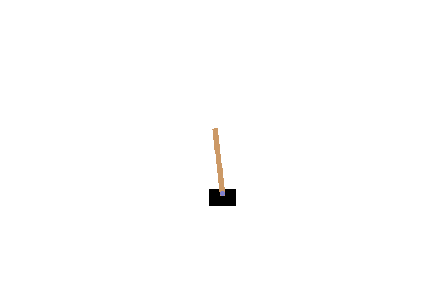
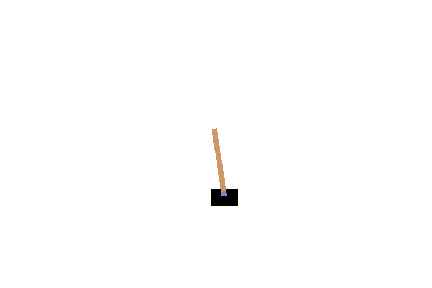
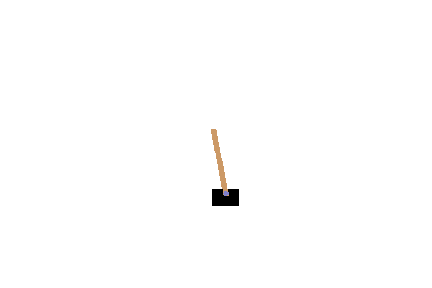

In [5]:
# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

You might wonder what do the states represent? Let's look at the images:<br>
<img src="cartpole.png"> 

<font color = blue >**System (short) description** </font> : a pole is attached to a cart, when the cart moves, the pole will have a swinging motion follow, our input to the cart is either force, accleration,etc... For more details about the system and what we are about to do, I encourage you to visit this link: https://www.youtube.com/watch?v=Lt-KLtkDlh8  <br>

<font color = blue >**Goal (short) description** </font> : Keep the pole stand upward by applying correct force to the cart. <br>

For the state we've been shown, here's a details: <br>
index: 0 - cart position | 1 - cart velocity | 2 - pole angle | 3 - pole velocity <br>
**For almost dynamical systems, position and velocity are defined as the state of them.**
What about acceleration? For short and simple answer, dynamical systems are often represented with the following differential equations, given state vector (postion, velocity) q and input (force, acceleration, etc...) u: <br>
\begin{align}
\dot{q} & = A(q,u) \\
\end{align}

If we recall, derivative of velocity of acceleration, and that is represented in the RHS of our equation. <br>

For the control theory (if you known something about this), we know the function dynamics function A (which is somehow related to the transistion function), but in reinforcement learning scenario, little to none we have any information about it.



In [6]:
box = env.observation_space

In [7]:
#To observe, press tab after box. for more information

In [8]:
env.action_space # 2 types of action: push left, push right

Discrete(2)

In [9]:
env.action_space.n # Seems like the input is not continuous....

2

In [10]:
"""Let's play an episode:"""
obser, reward, done,info = env.step(action=0)

[2017-10-03 16:55:08,752] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [11]:
"""Let's see them"""
obser

array([ 0.10742039,  0.77995733, -0.26728923, -1.493165  ])

In [12]:
reward

0.0

In [13]:
done

True

In [14]:
info

{}

In [15]:
#Push 1 side

done = False
env.reset()
while not done:
    action = 1
    obser, reward, done,info = env.step(action)
    print 'state: ', obser,' actions: ', action, 'reward: ', reward

state:  [-0.03469811  0.15274563  0.02846595 -0.30224603]  actions:  1 reward:  1.0
state:  [-0.03164319  0.34745055  0.02242103 -0.58581724]  actions:  1 reward:  1.0
state:  [-0.02469418  0.54225141  0.01070469 -0.87135384]  actions:  1 reward:  1.0
state:  [-0.01384915  0.73722614 -0.00672239 -1.16065207]  actions:  1 reward:  1.0
state:  [  8.95369093e-04   9.32435019e-01  -2.99354330e-02  -1.45543514e+00]  actions:  1 reward:  1.0
state:  [ 0.01954407  1.12791136 -0.05904414 -1.75731799]  actions:  1 reward:  1.0
state:  [ 0.0421023   1.32365047 -0.0941905  -2.06776389]  actions:  1 reward:  1.0
state:  [ 0.06857531  1.51959612 -0.13554577 -2.38803062]  actions:  1 reward:  1.0
state:  [ 0.09896723  1.71562454 -0.18330639 -2.71910475]  actions:  1 reward:  1.0
state:  [ 0.13327972  1.91152577 -0.23768848 -3.06162429]  actions:  1 reward:  1.0


**Notice that the velocity of the pole &the cart are high & the reward is 1 --> means that the system is still in some kind of stability**

In [16]:
#Random action

done = False
env.reset()
while not done:
    action = env.action_space.sample()
    obser, reward, done,info = env.step(action)
    print 'state: ', obser,' actions: ', action, 'reward: ', reward

state:  [-0.01580812  0.20019402  0.01437103 -0.29743723]  actions:  1 reward:  1.0
state:  [-0.01180424  0.00487018  0.00842228 -0.0002568 ]  actions:  0 reward:  1.0
state:  [-0.01170684 -0.19037154  0.00841715  0.29507152]  actions:  0 reward:  1.0
state:  [-0.01551427 -0.38561247  0.01431858  0.59039716]  actions:  0 reward:  1.0
state:  [-0.02322652 -0.58093194  0.02612652  0.88755585]  actions:  0 reward:  1.0
state:  [-0.03484516 -0.77639858  0.04387764  1.18833607]  actions:  0 reward:  1.0
state:  [-0.05037313 -0.58187204  0.06764436  0.90972299]  actions:  1 reward:  1.0
state:  [-0.06201057 -0.77784107  0.08583882  1.22287653]  actions:  0 reward:  1.0
state:  [-0.07756739 -0.58392335  0.11029635  0.95827656]  actions:  1 reward:  1.0
state:  [-0.08924586 -0.39044332  0.12946188  0.70218145]  actions:  1 reward:  1.0
state:  [-0.09705472 -0.58709934  0.14350551  1.03265247]  actions:  0 reward:  1.0
state:  [-0.10879671 -0.78380806  0.16415856  1.36672848]  actions:  0 rewar

# Random Search:

Oftenly, we would like to find optimal weights to obtain the maximum (minimum) values. Now, we will not talk about gradient descent, instead, we are going to implement a random search algorithm. The pseudocode for random search for finding maxima is as follows: <br>

--------------
1. Initialize x (weights) & calculate f(x)<br>
2. While not satisfied: <br>
          -Randomly pick new weight values y
          -If (f(y) > f(x))
                set: x = y
---------------

<font color = green > **As we may figured out, doing this way is extremly inefficient (space complexity, no heuristic, etc...). However, as introduction to gym, this is a good thing to try out.** </font>


# APPROACH:

- Goal: the longer the pole stands up, the better our policy is
- Method: for each policy based on the weights, measure the average time the pole stands over number of epoches.
- Update the weight based on the random search algorithm

In [17]:
import numpy as np #our old friends


In [18]:
mu = 0
sigma = 1
w = np.random.normal(mu, sigma, 4)
print w

[ 1.25395302 -1.43260614  0.62043424 -0.20974608]


In [19]:
#Our policy is simple, if the state * w >0, take action 1, else 0
#Let's "train" our model
EPOCHS = 100
N_EPISODES = 1000
best_till_now= 0

for epochs in range(EPOCHS): # number of possible updates
    
    random_weight = np.random.normal(mu,sigma,4)
    total_time = 0
    avg_time = 0
    for episodes in range(N_EPISODES):  #Run to calculate average standing time
        done = False
        obser = env.reset()
        action_time = 0
        while not done:
            action = int(np.dot(random_weight, obser) >0)
            obser, reward, done,info = env.step(action)
            action_time = action_time +1
        total_time = total_time + action_time 
    avg_time = total_time/N_EPISODES
    if (avg_time > best_till_now):
        w = random_weight
        best_till_now = avg_time
    print 'epoches ', epochs, ' finished'
    print 'Best weights by random search: ', w
    print 'Best time: ', best_till_now
    print ' '

epoches  0  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  1  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  2  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  3  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  4  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  5  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  6  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  7  finished
Best weights by random search:  [-0.84828293  0.41007941  0.70831616  0.98375971]
Best time:  176
 
epoches  8  finished
Best weight

epoches  68  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  69  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  70  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  71  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  72  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  73  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  74  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  75  finished
Best weights by random search:  [ 0.60002113  0.13822467  1.37006222  0.81508782]
Best time:  199
 
epoches  76  finished
Be

Number of step:  199



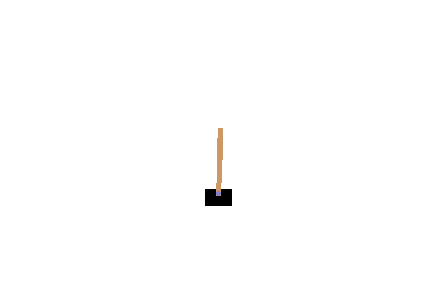
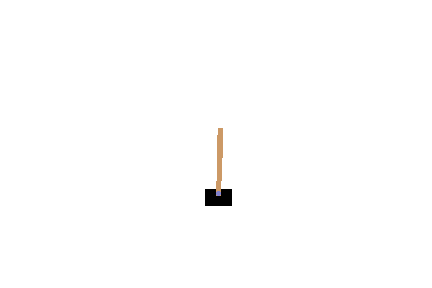
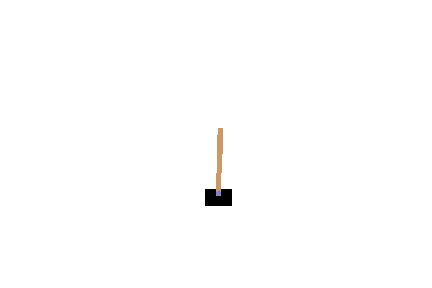
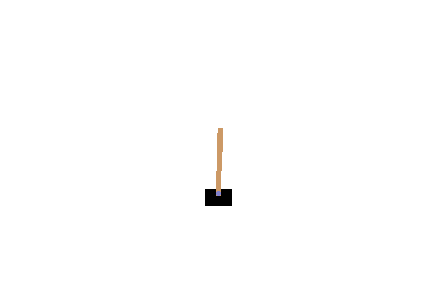
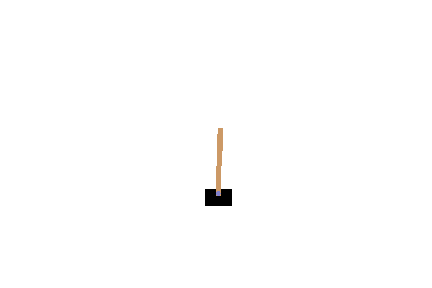
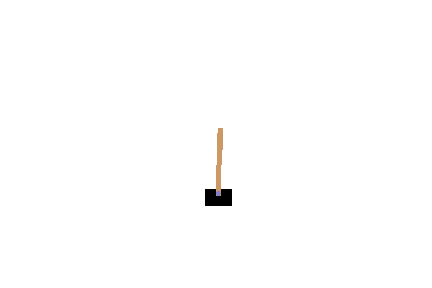
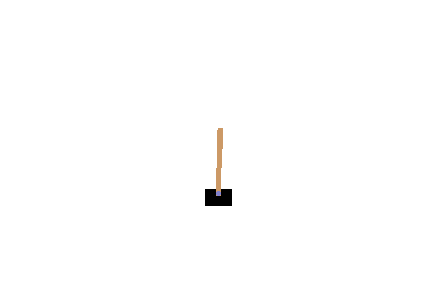
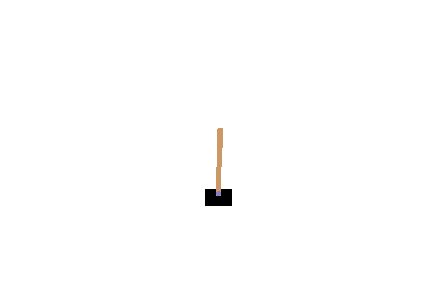
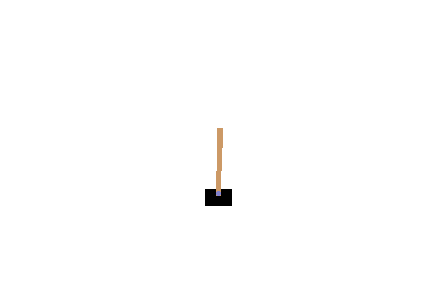
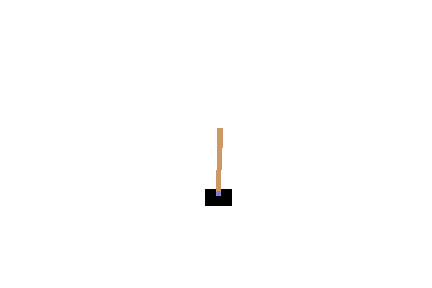
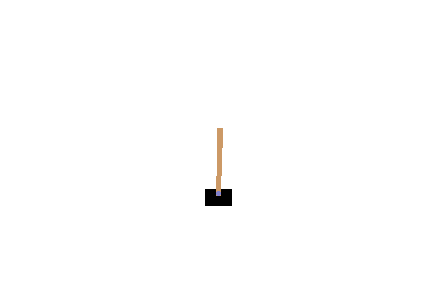
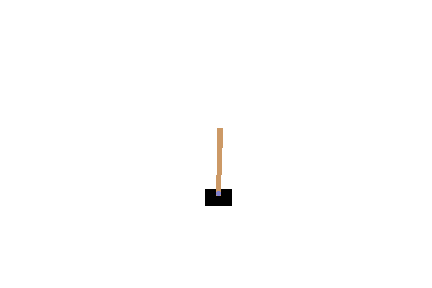
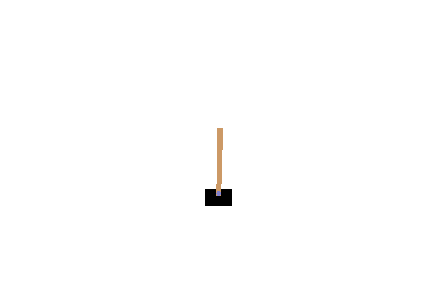
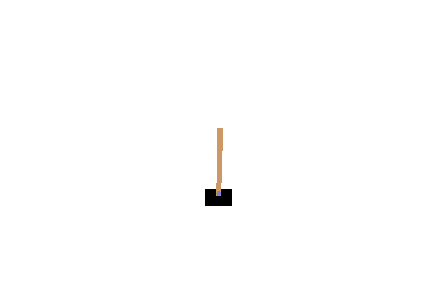
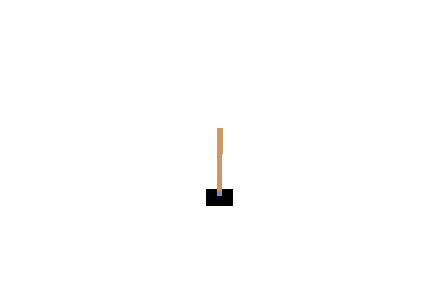
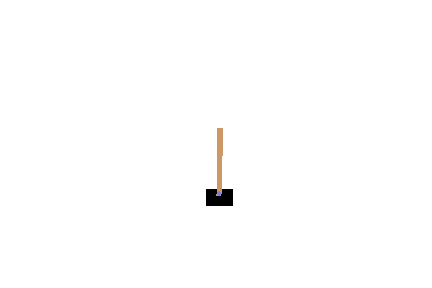
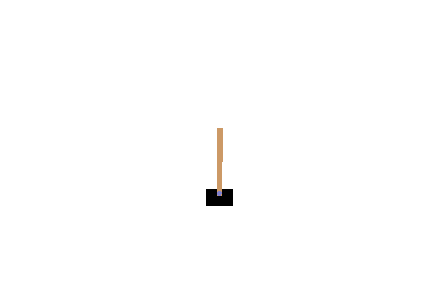
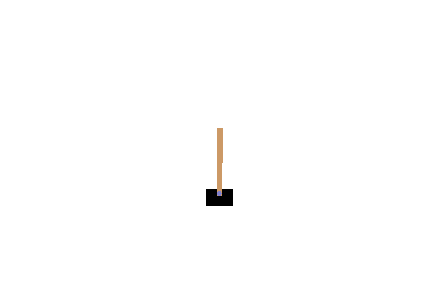
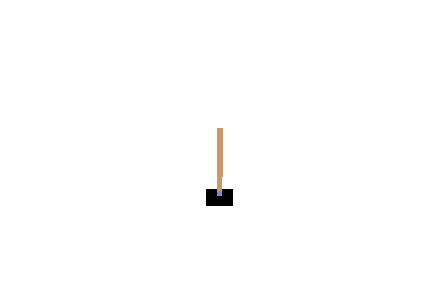
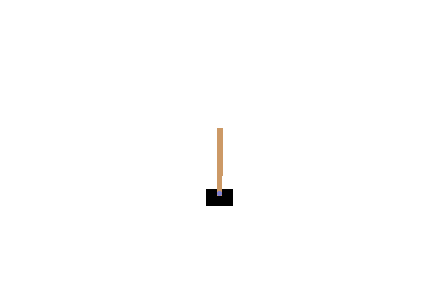
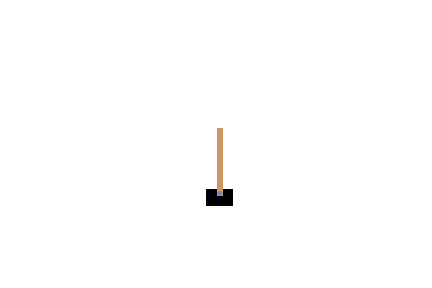
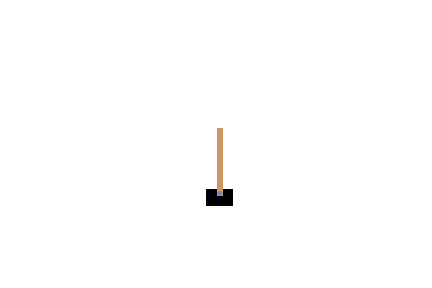
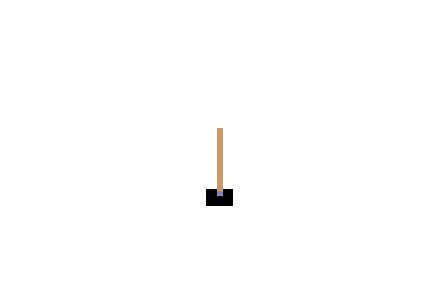
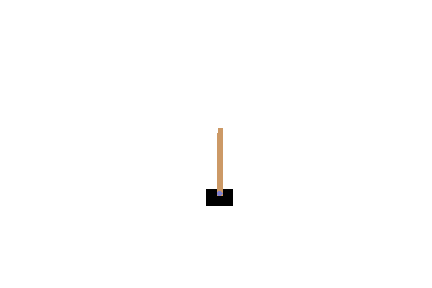
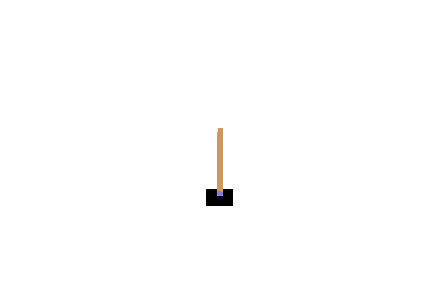
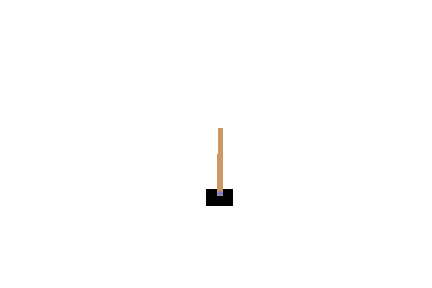
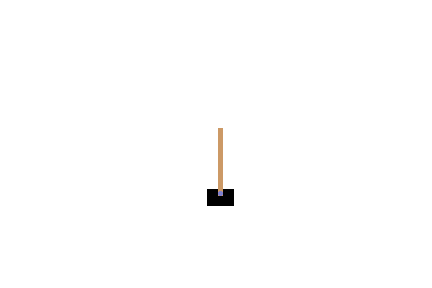
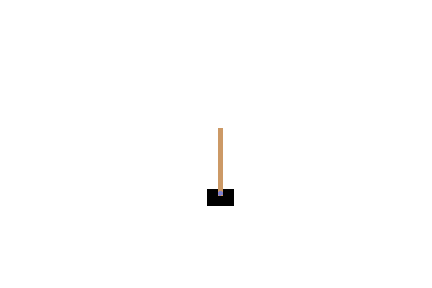
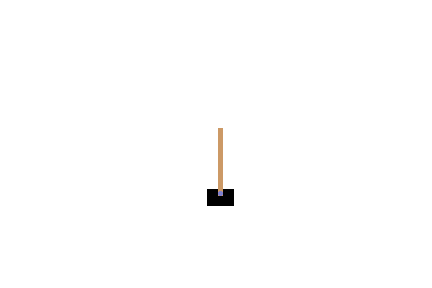
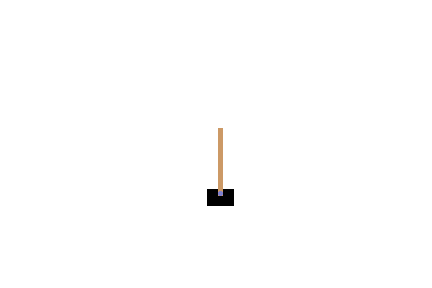
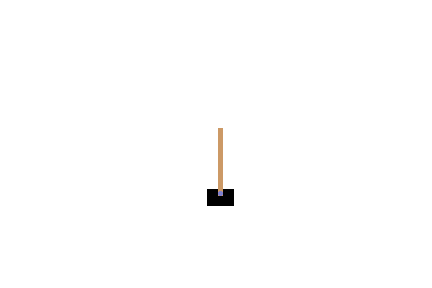
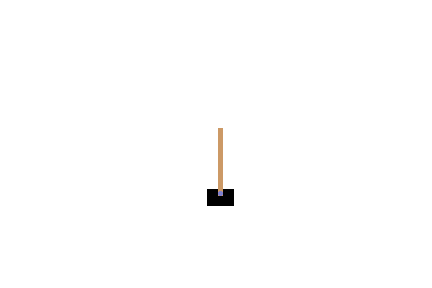
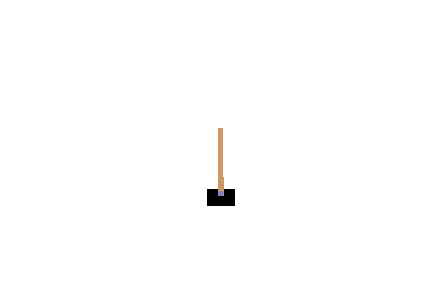
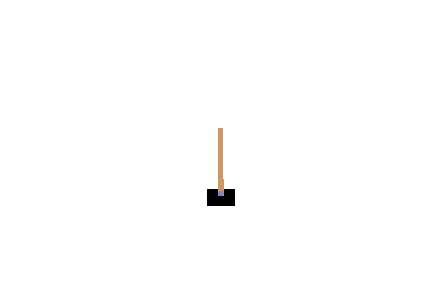
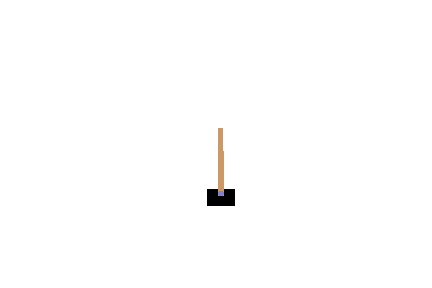
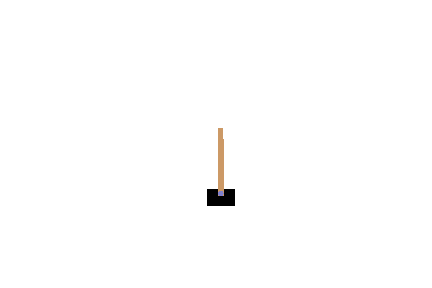
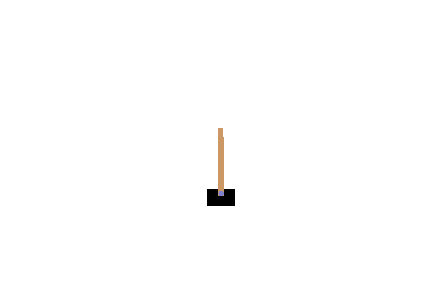
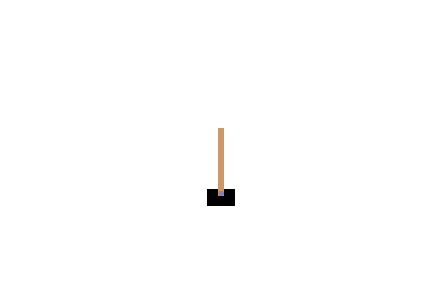
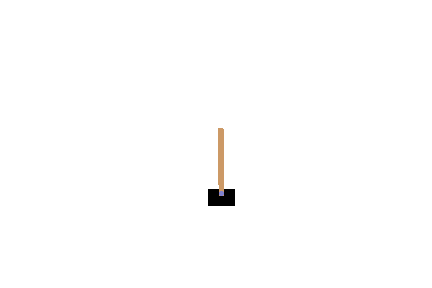
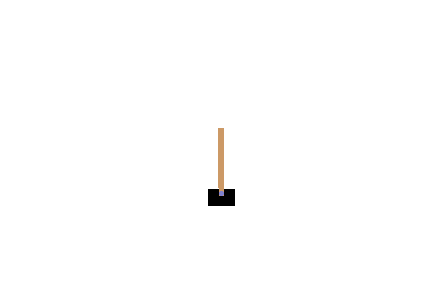
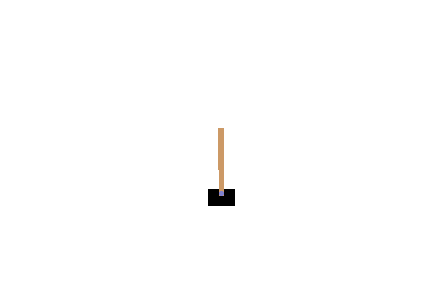
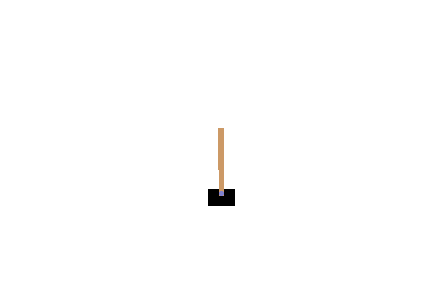
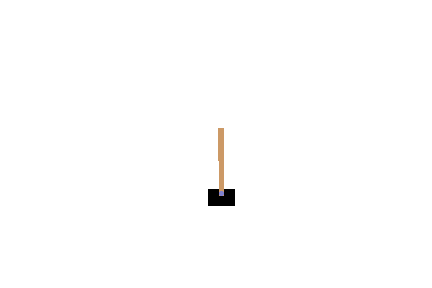
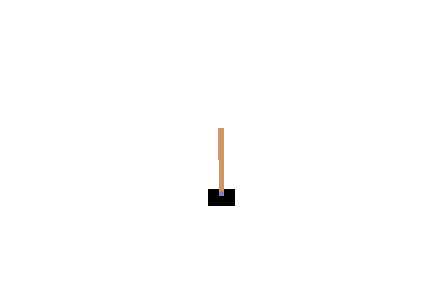
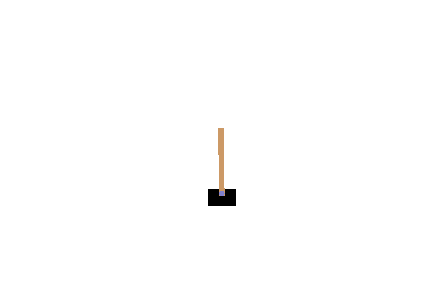
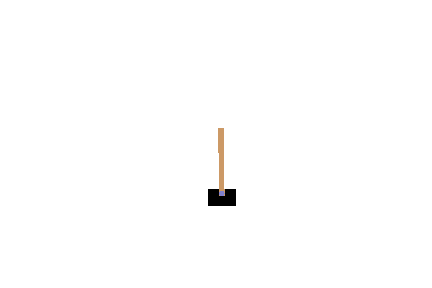
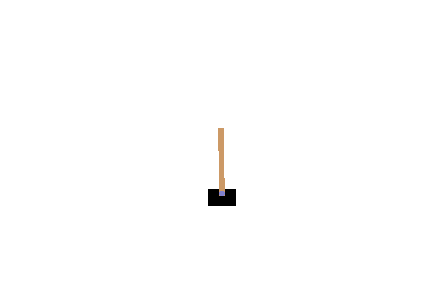
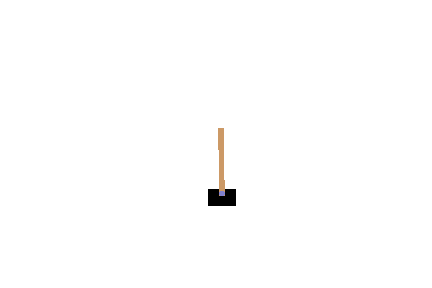
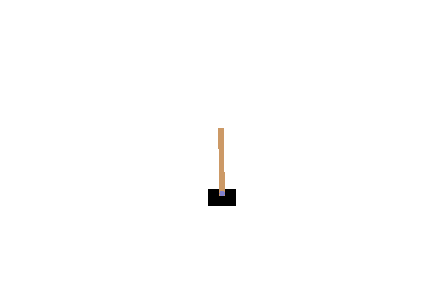
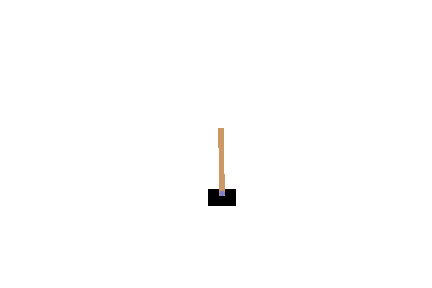
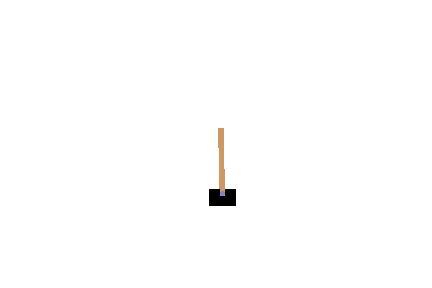
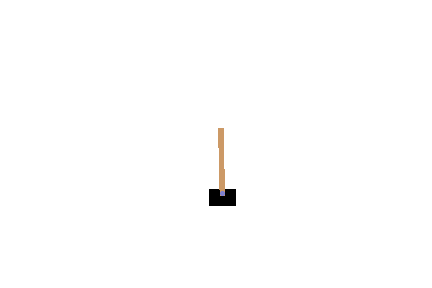
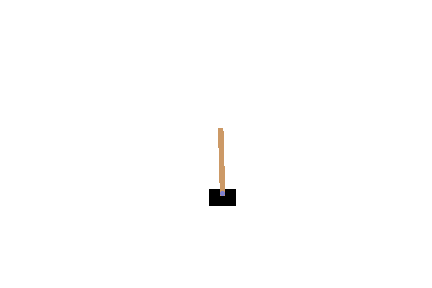
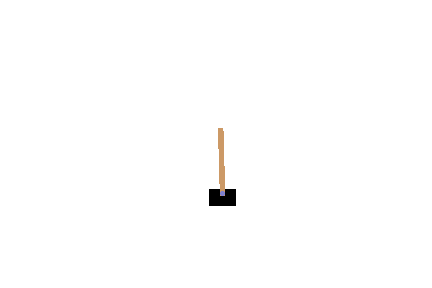
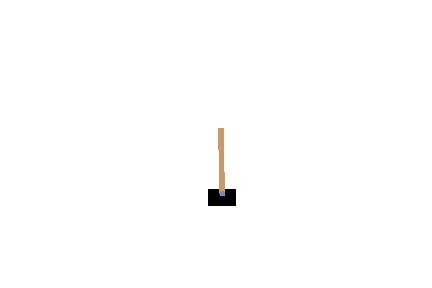
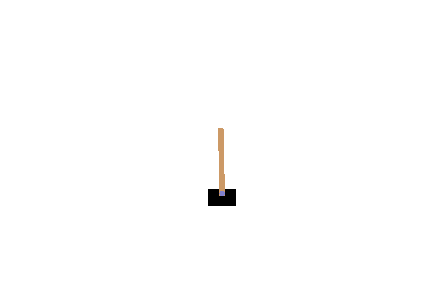
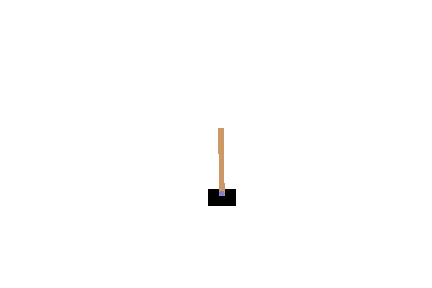
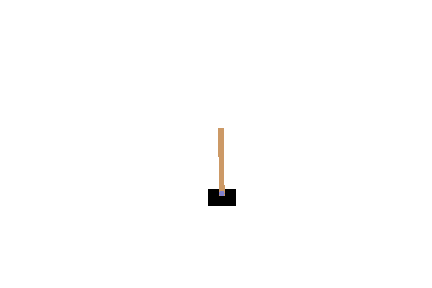
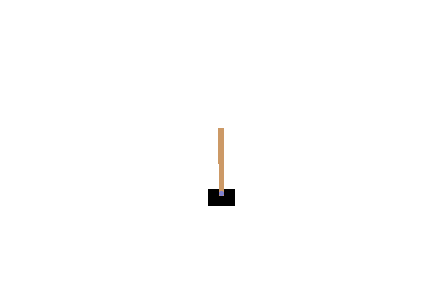
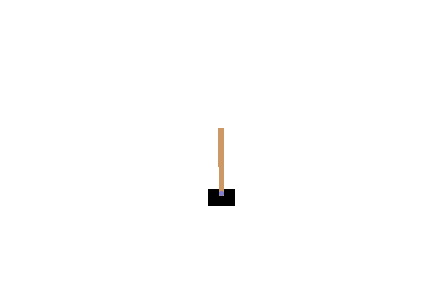
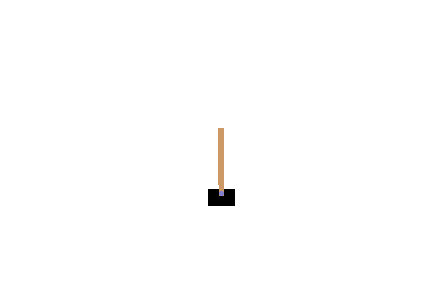
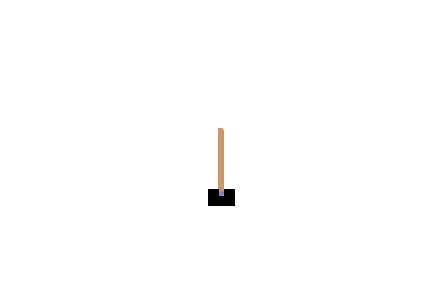
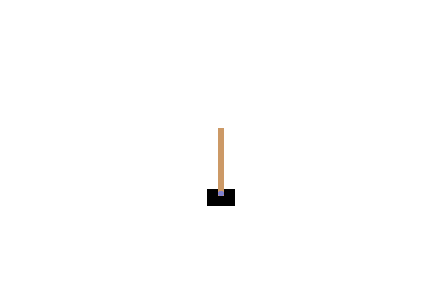
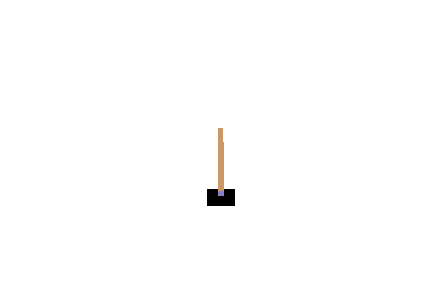
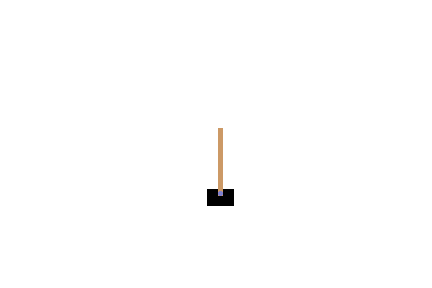
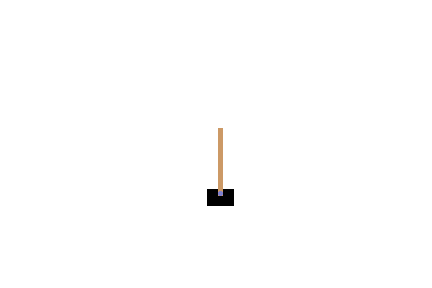
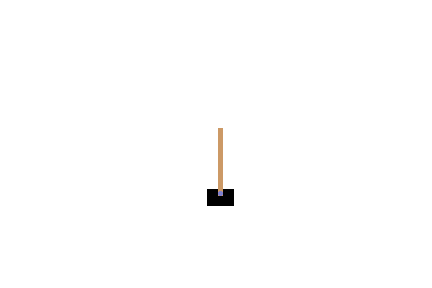
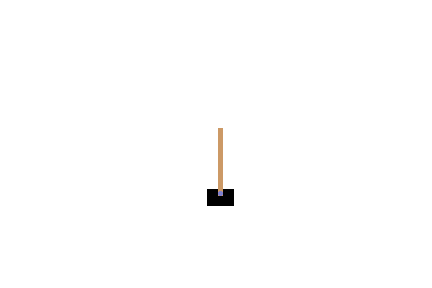
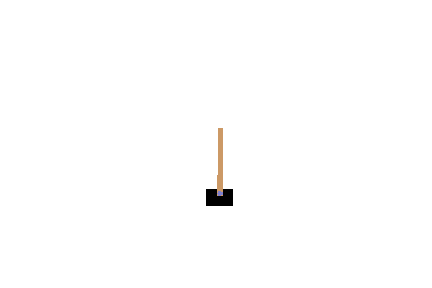
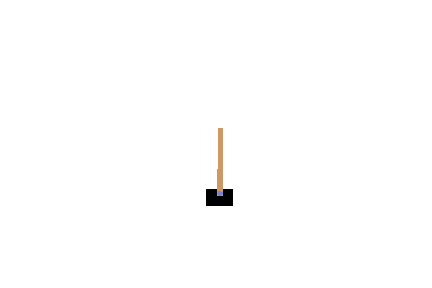
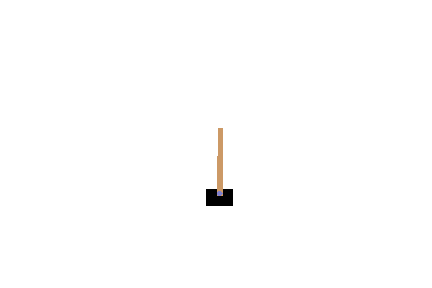
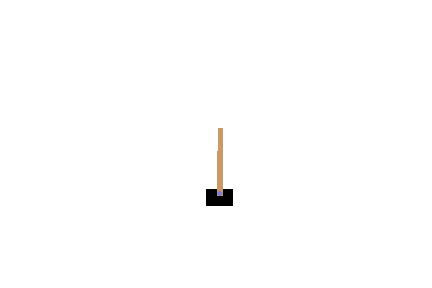
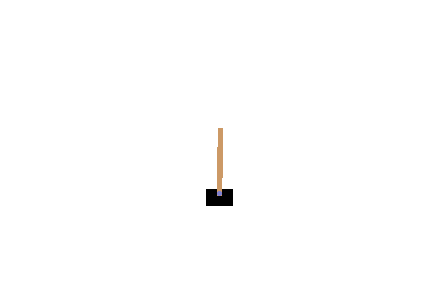
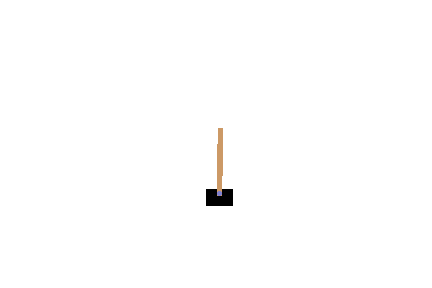
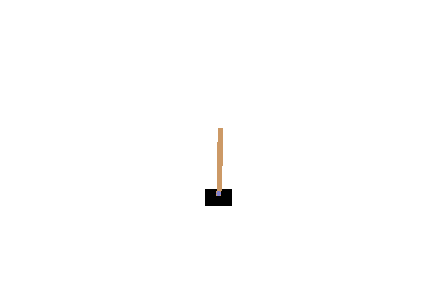
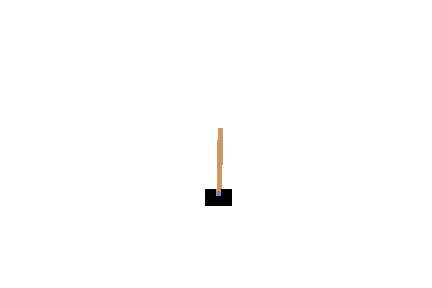
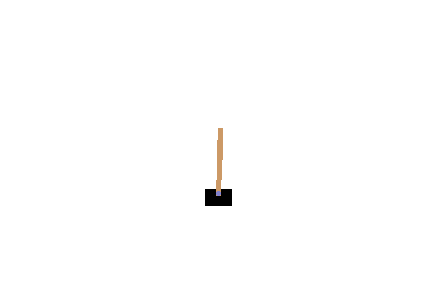
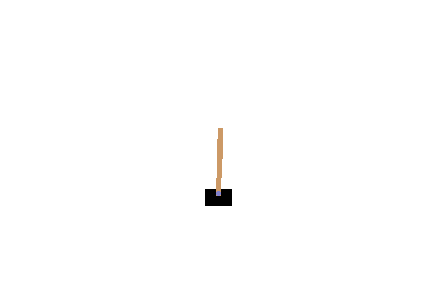
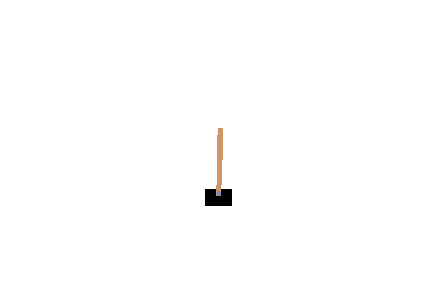
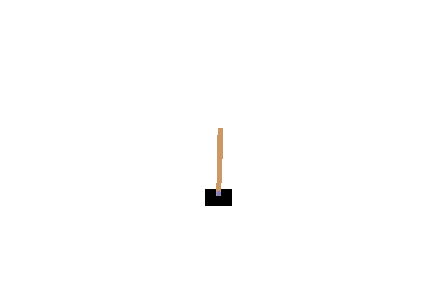
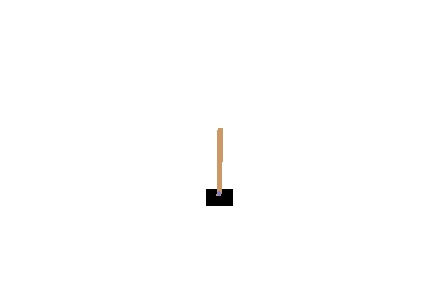
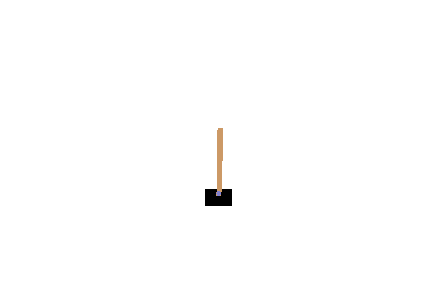
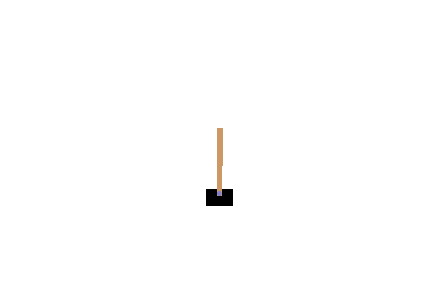
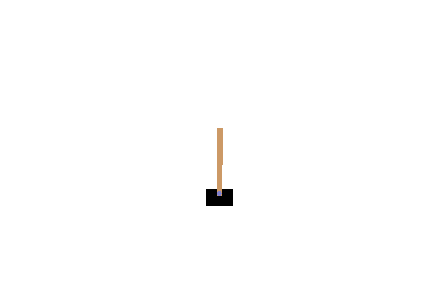
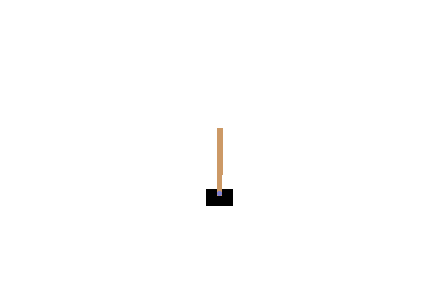
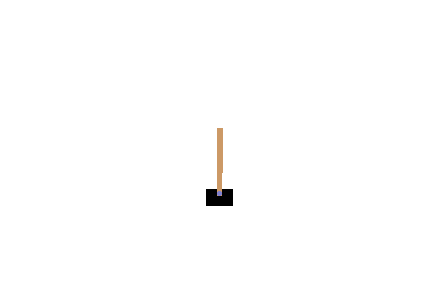
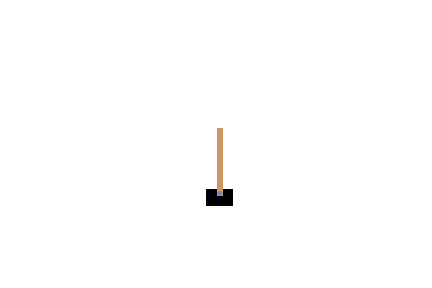
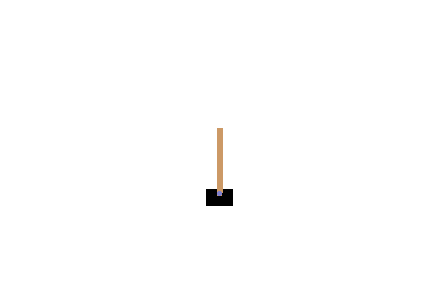
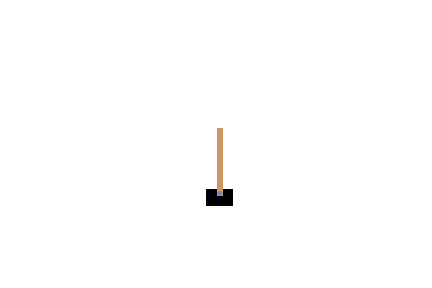
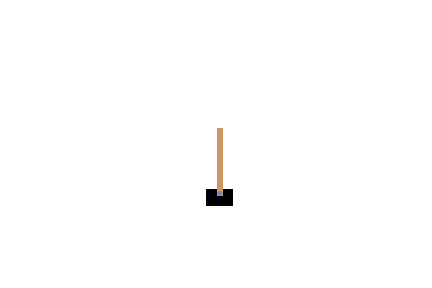
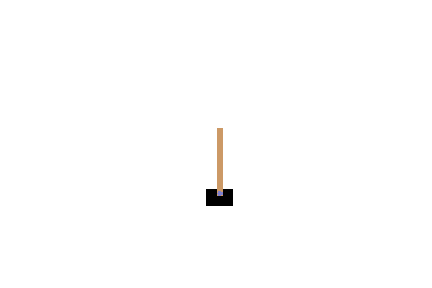
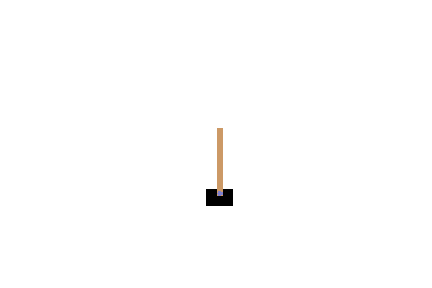
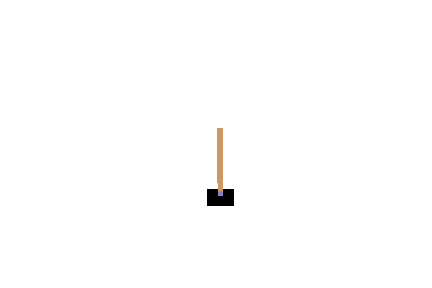
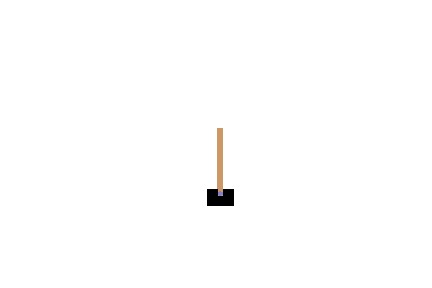
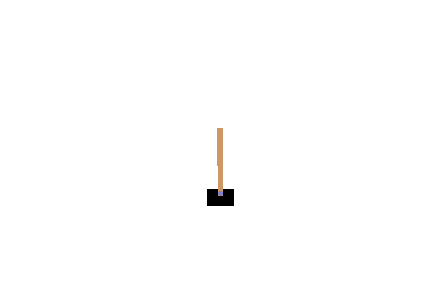
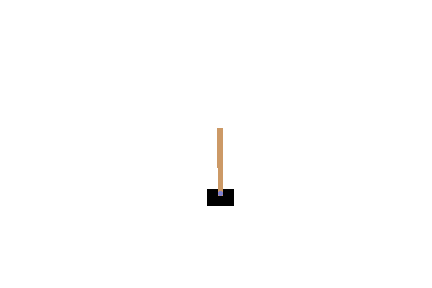
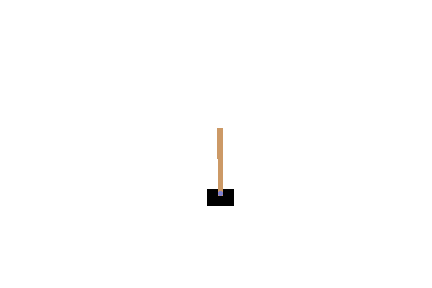
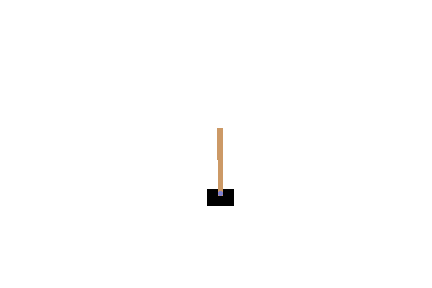
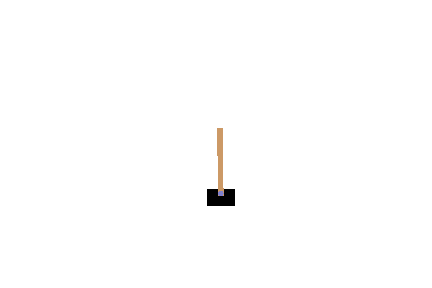
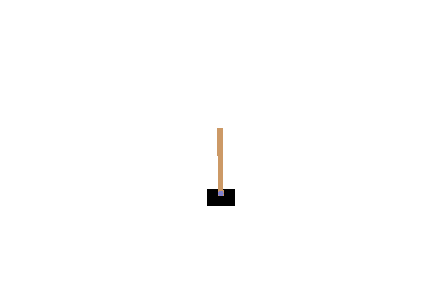
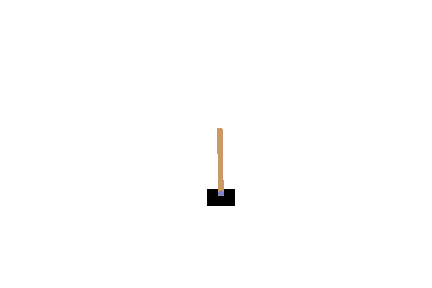
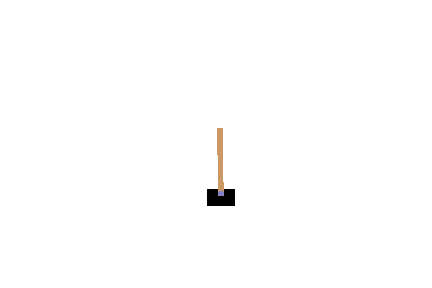
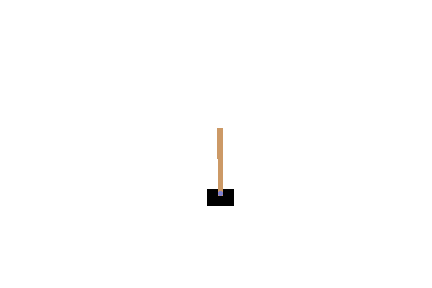
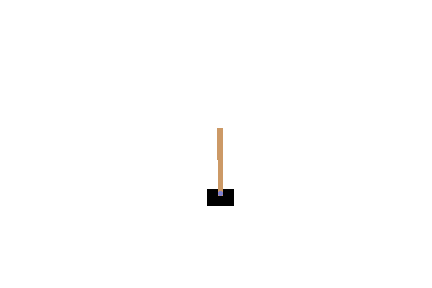
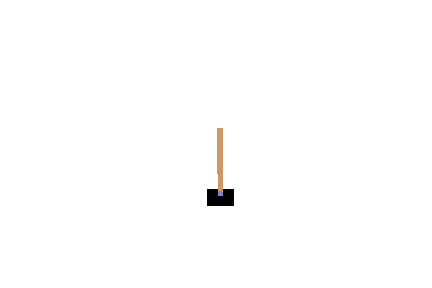
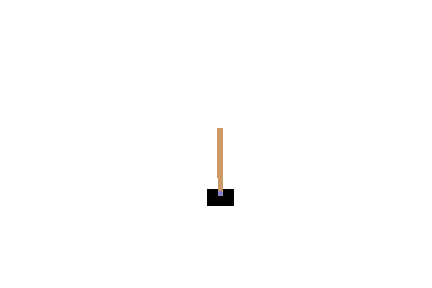
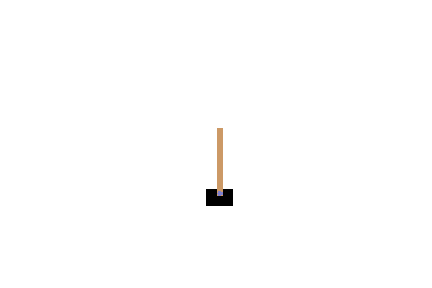
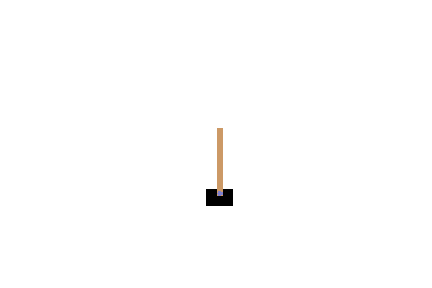
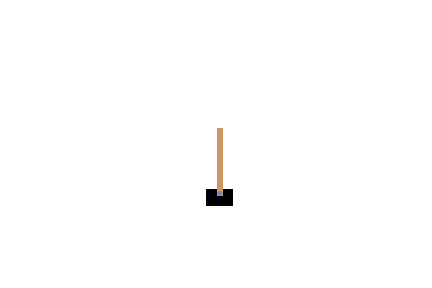
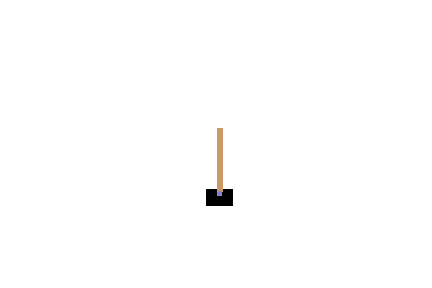
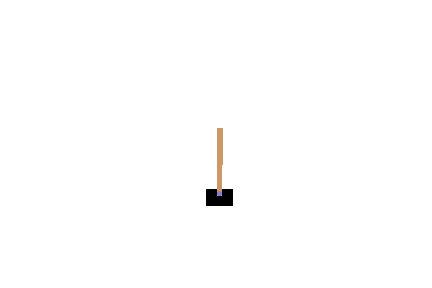
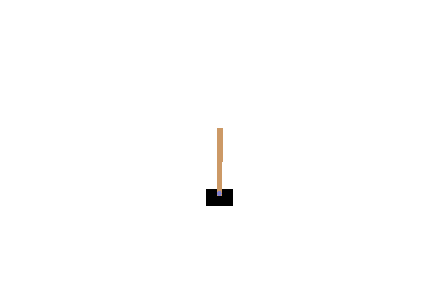
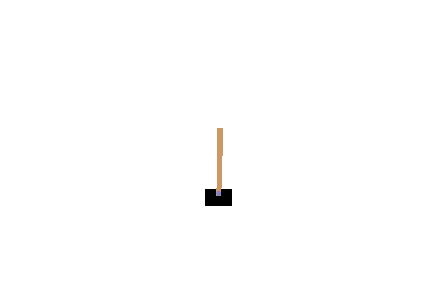
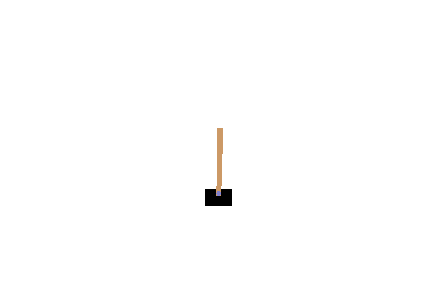
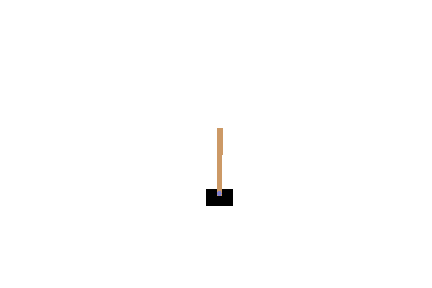
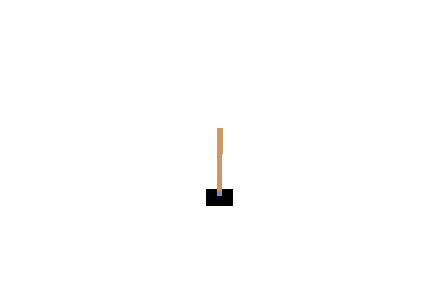
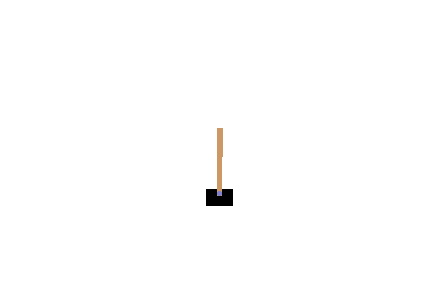
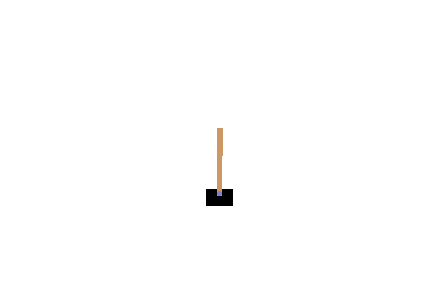
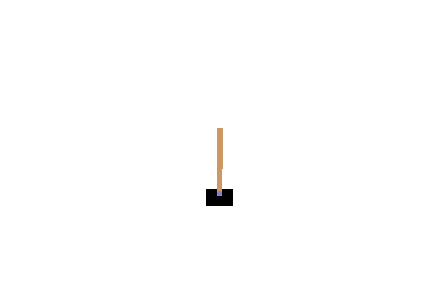
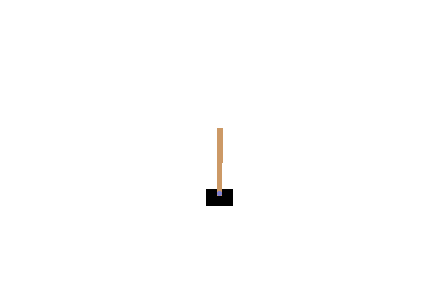
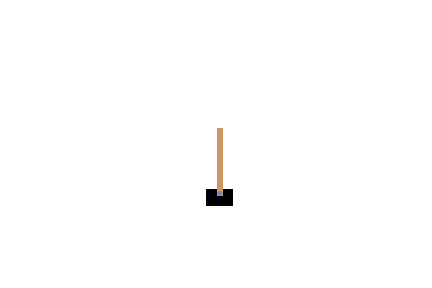
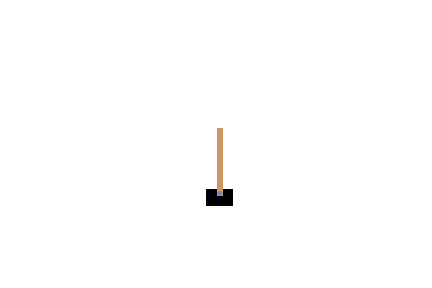
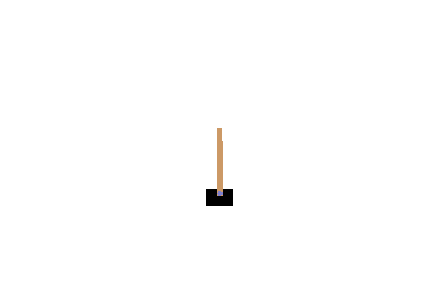
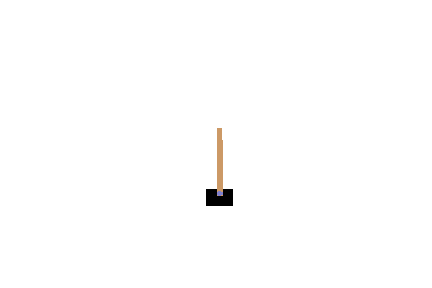
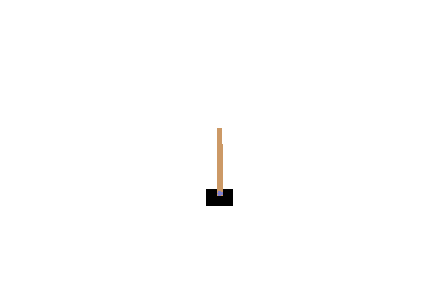
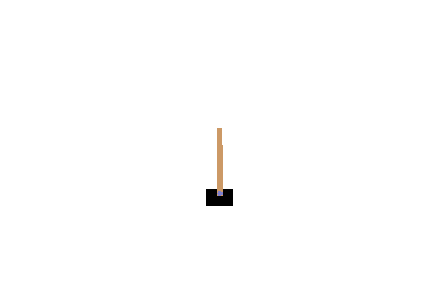
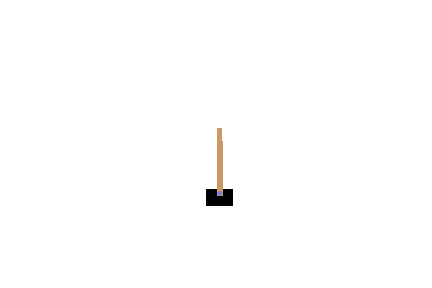
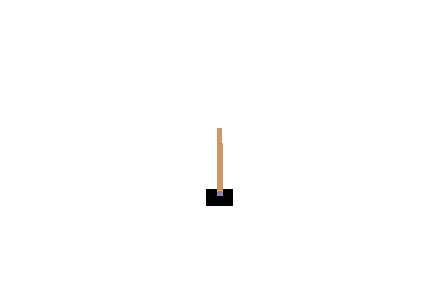
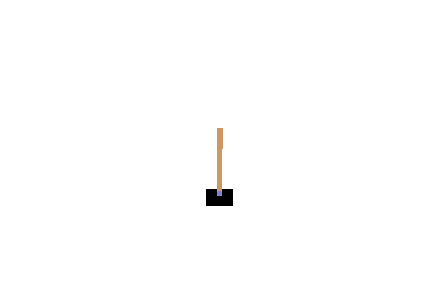
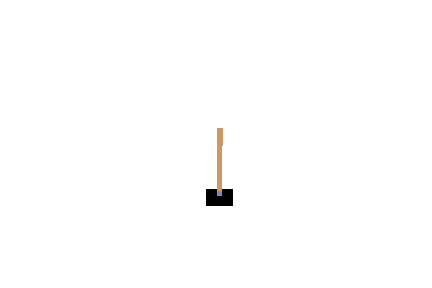
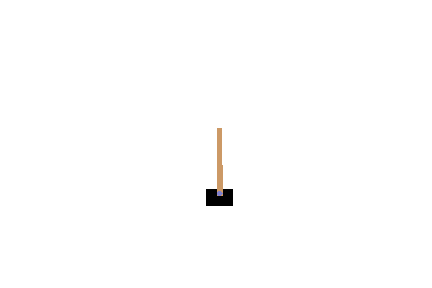
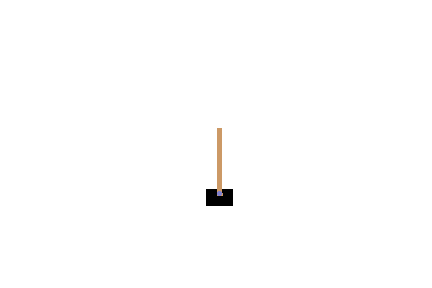
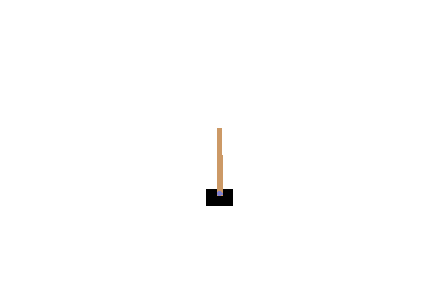
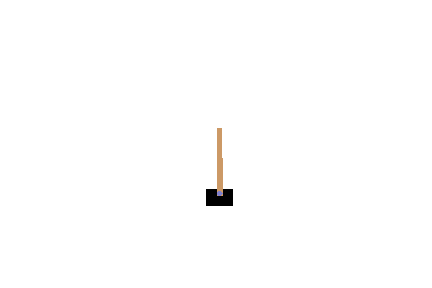
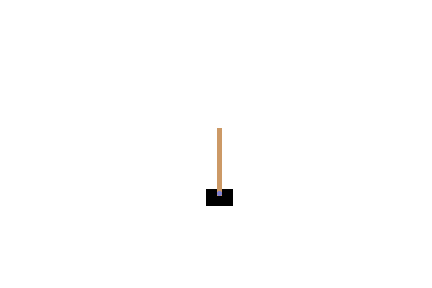
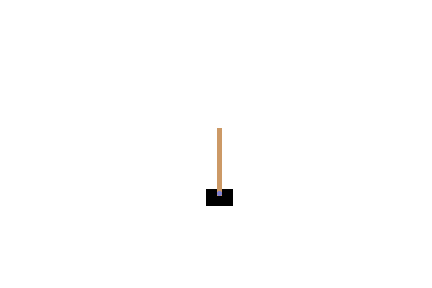
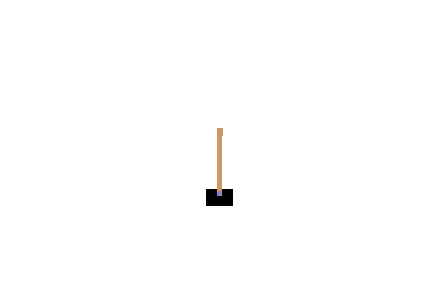
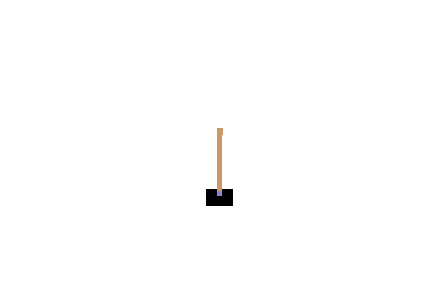
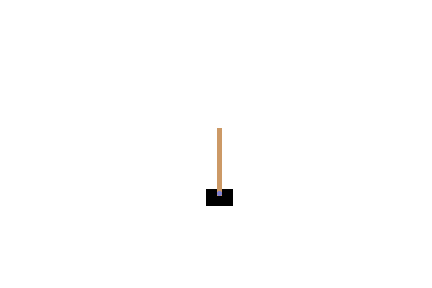
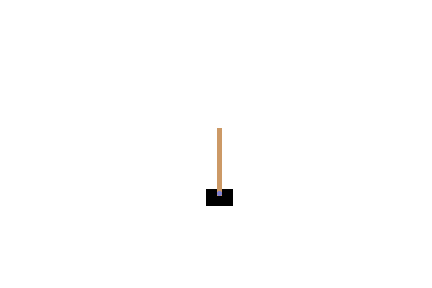
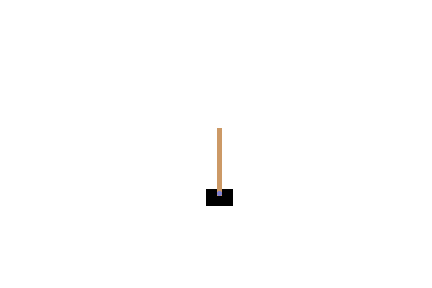
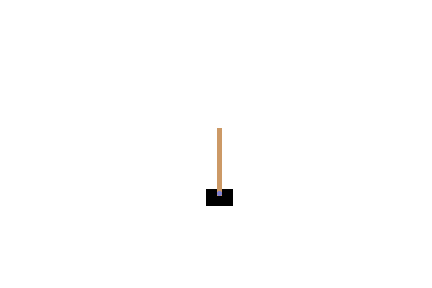
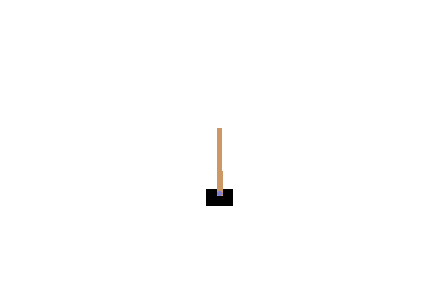
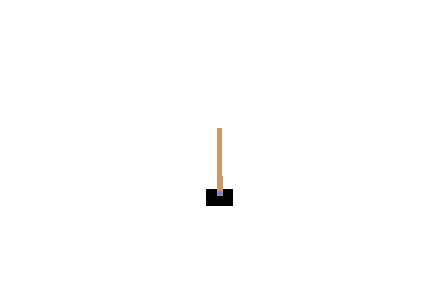
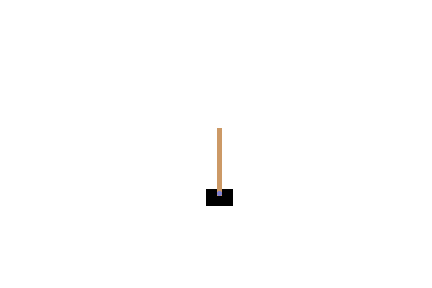
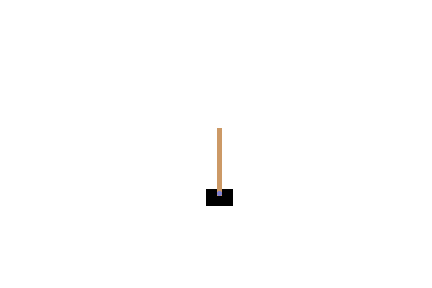
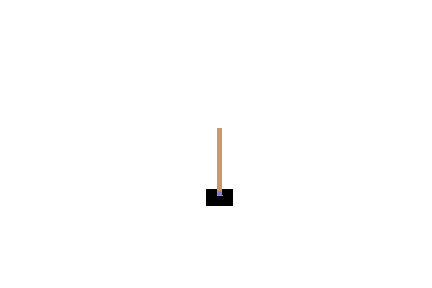
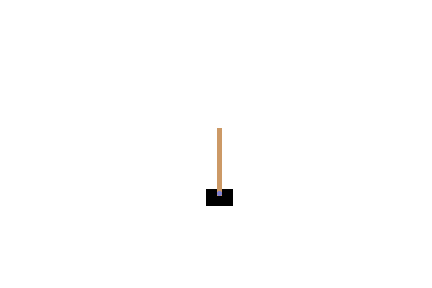
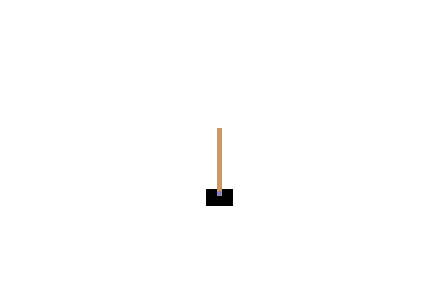
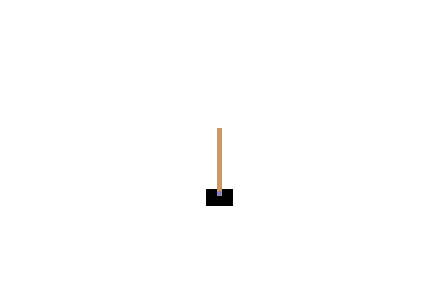
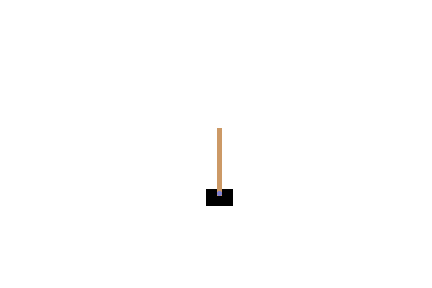
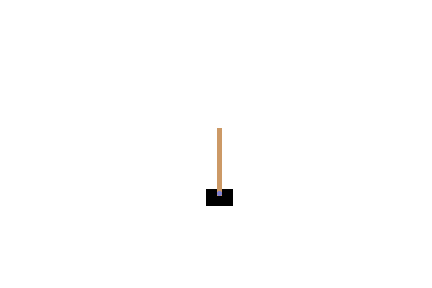
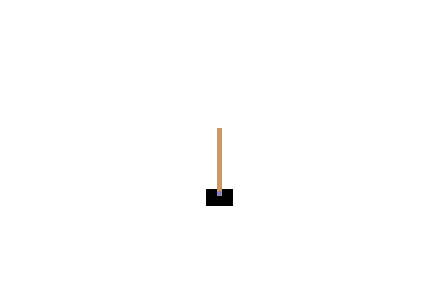
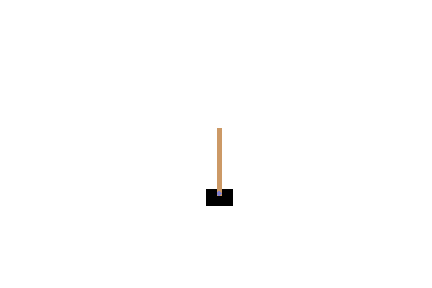
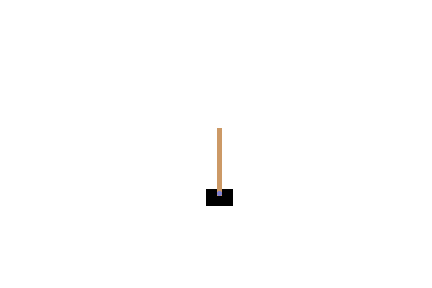
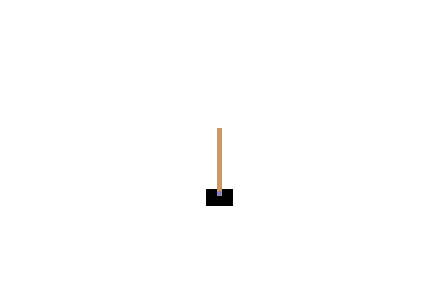
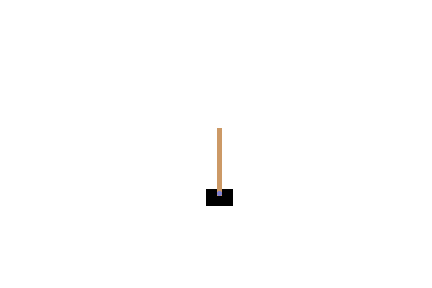
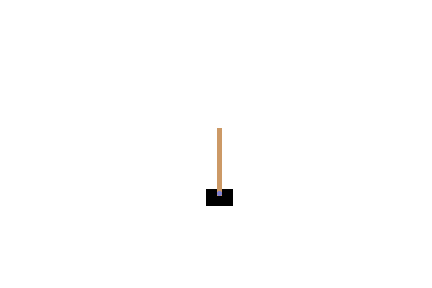
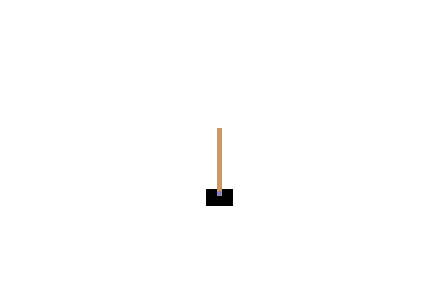
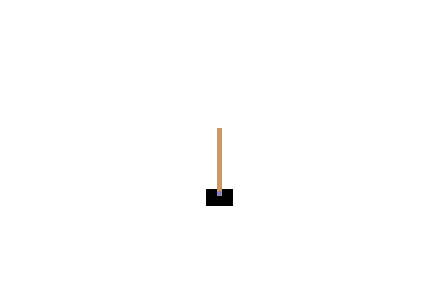
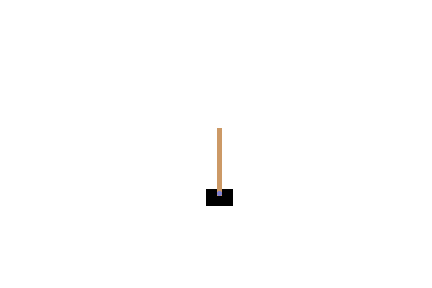
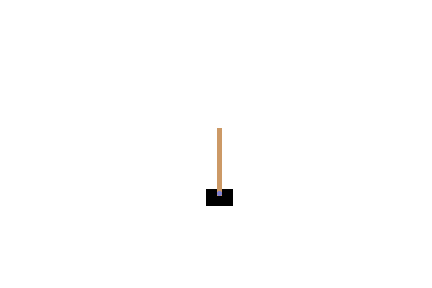
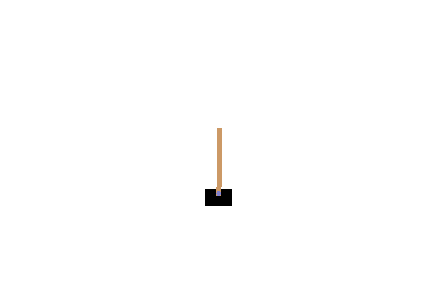
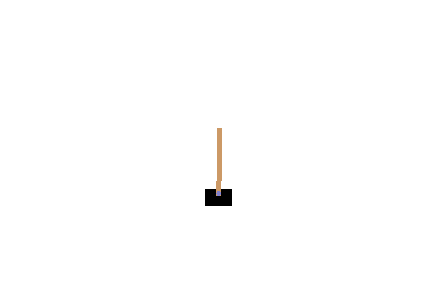
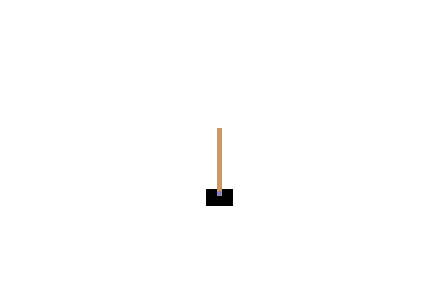
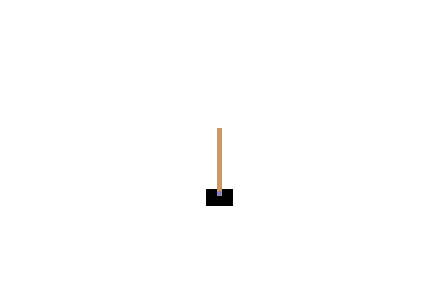
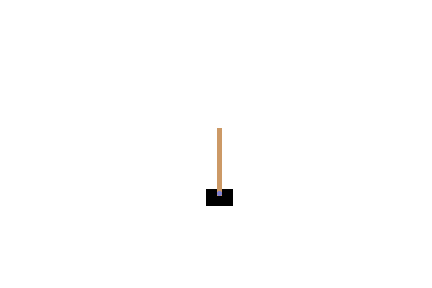
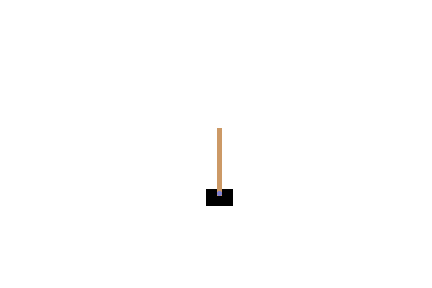
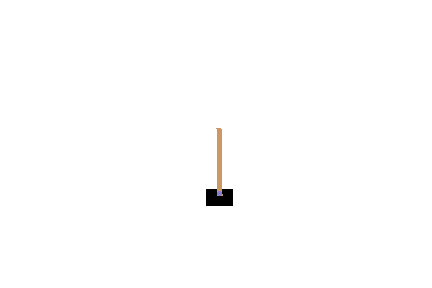
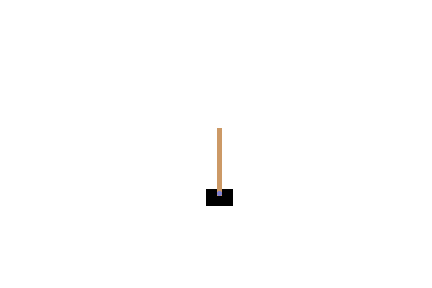
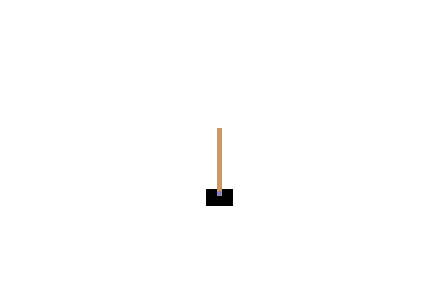
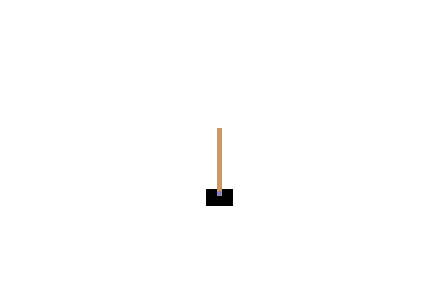
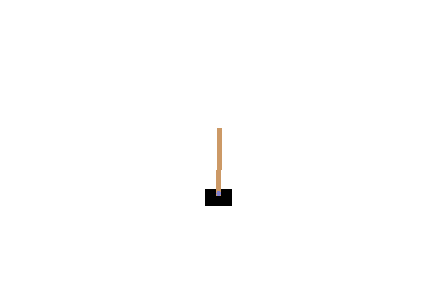
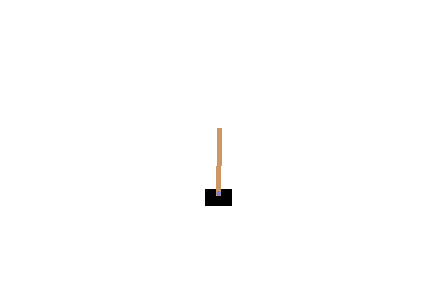
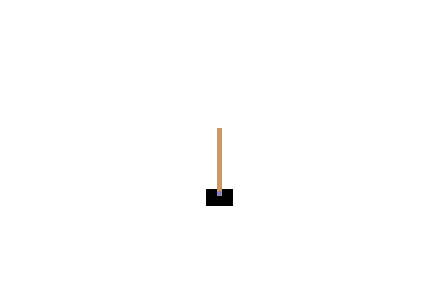
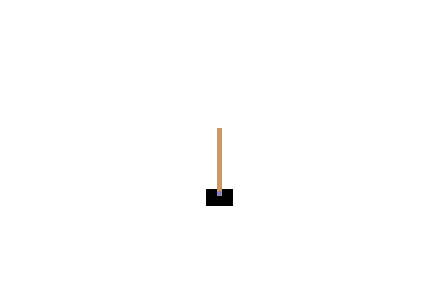
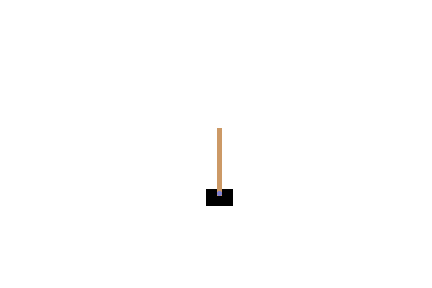
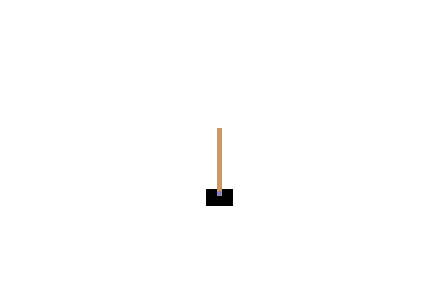
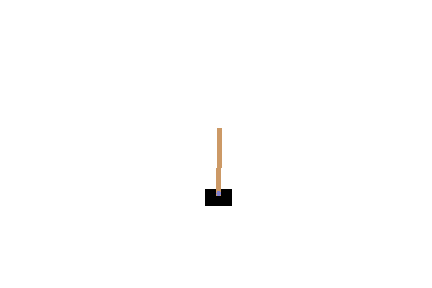
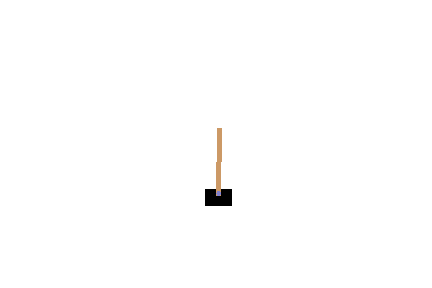
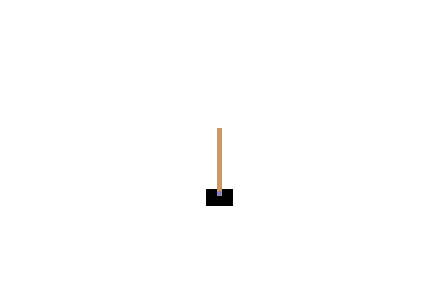
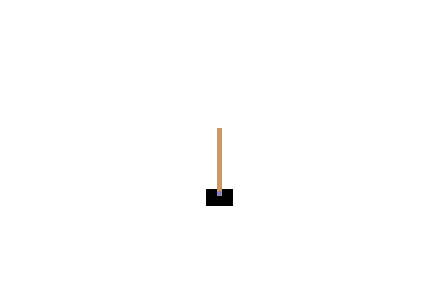
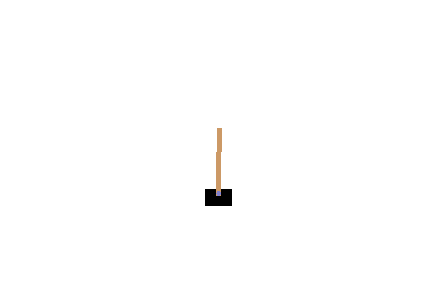
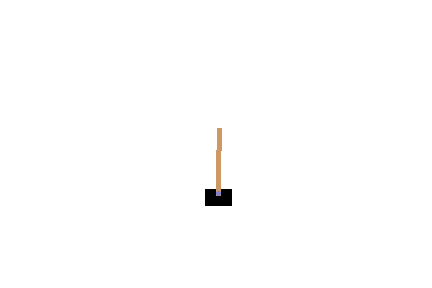
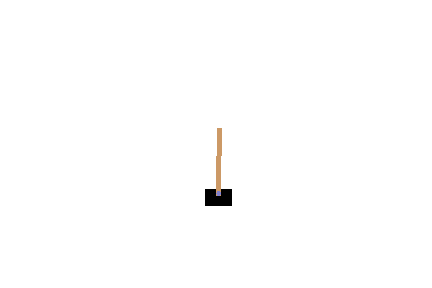
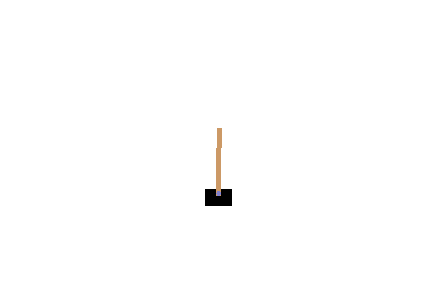
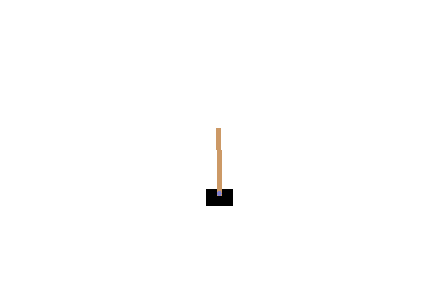
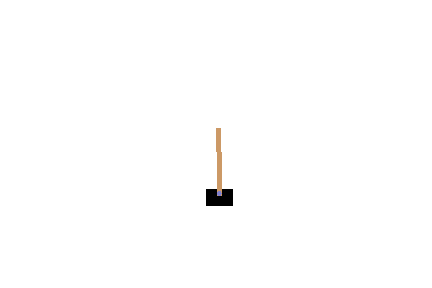
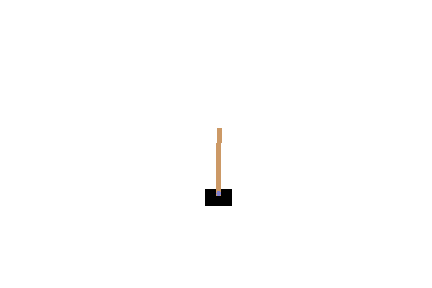
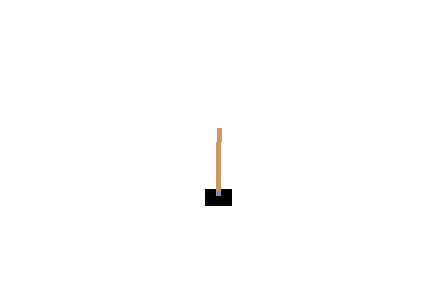
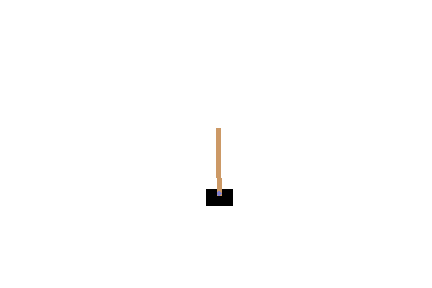
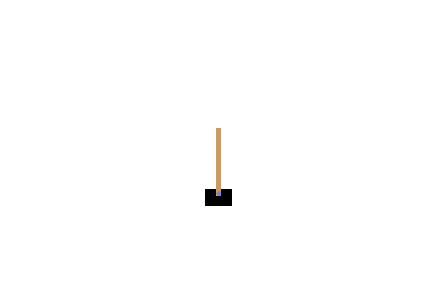
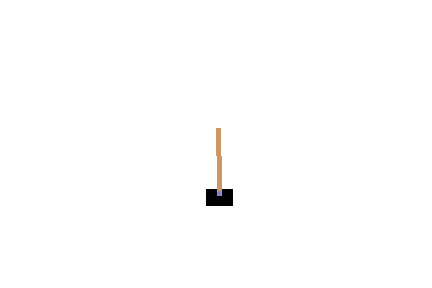
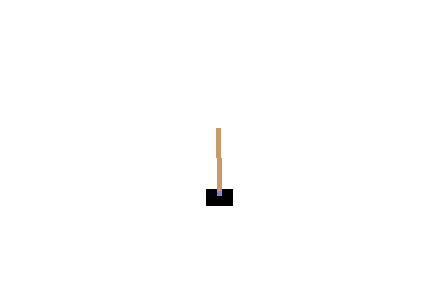
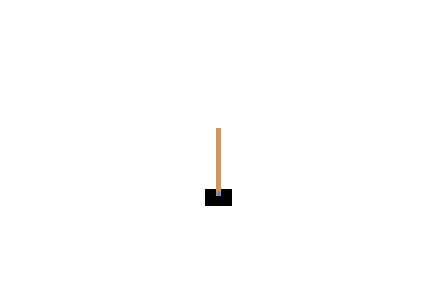
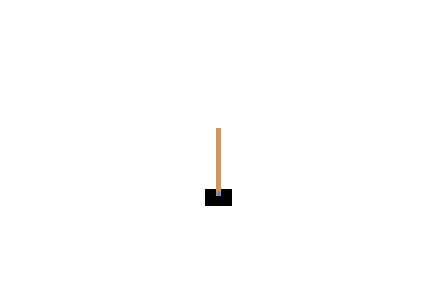
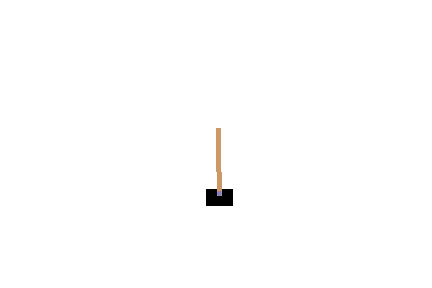
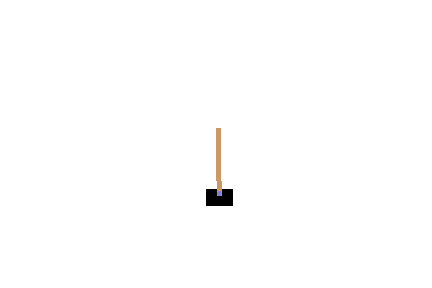
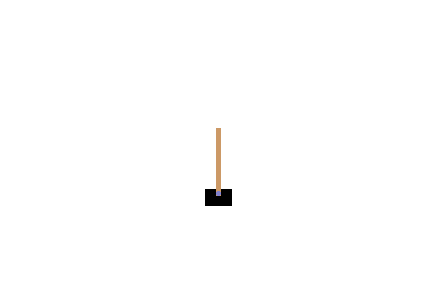
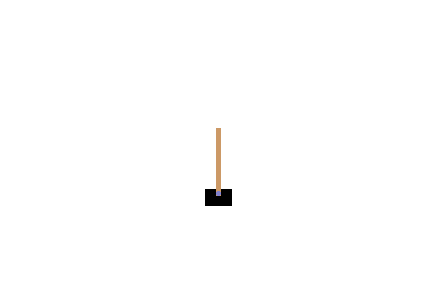

In [20]:
# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = int(np.dot(w, observation) >0)
    observation, reward, done, info = env.step(action)
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

# The result is quite good actually, but still too naive. Why? This linear solution should be very close to the LQR case for this kind of system (if you don't have experience with control theory, it would be nice to have a look at it), which only works in the linear region of the pole (small angle). We need a much more complicated model if we want our policy to work in any arbitary states